In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [4]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,...,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,724.867517,10738.358194,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,...,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,415.043138,3614.987568,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,...,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,8400.000000,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,9850.000000,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,31000.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
## x축, y축 분류
dfy = df.ix[:, :3]
dfX = df.ix[:, 3:]
print(len(dfy.columns), len(dfX.columns))

(3, 36)


c:\python27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [6]:
dfy.tail(2)

,Id,Model,Price
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950


In [7]:
dfX.tail(2)

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1017,70,11,1998,16916,Petrol,86,1,Grey,0,1300,...,0,0,0,0,0,1,0,0,0,0
1018,76,5,1998,1,Petrol,110,0,Green,0,1600,...,0,1,0,0,0,0,0,0,0,0


In [8]:
# 질적변수 / 양적변수 구분

# 구분 기준 : 배포된 data codes 를 검토하여 우선적으로 질적변수와 양적변수를 분류

cols_real = ['Age_08_04', 'Mfg_Year','KM','HP','CC','Doors',
             'Cylinders','Gears','Quarterly_Tax','Weight',
             'Guarantee_Period']
cols_cat = ['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
           ]

In [9]:
# 양적변수 DF
dfX_real = dfX[cols_real]
print(len(dfX_real.columns))
dfX_real.tail(2)

11


,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Guarantee_Period
1017,70,1998,16916,86,1300,3,4,5,69,1015,3
1018,76,1998,1,110,1600,5,4,5,19,1114,3


In [10]:
# 질적변수 DF
dfX_cat = dfX[cols_cat]
print(len(dfX_cat.columns))
dfX_cat.tail(2)

25


,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1017,11,Petrol,1,Grey,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1018,5,Petrol,0,Green,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### 양적변수의 산포도 확인
* x축 : 양적변수
* y축 : price

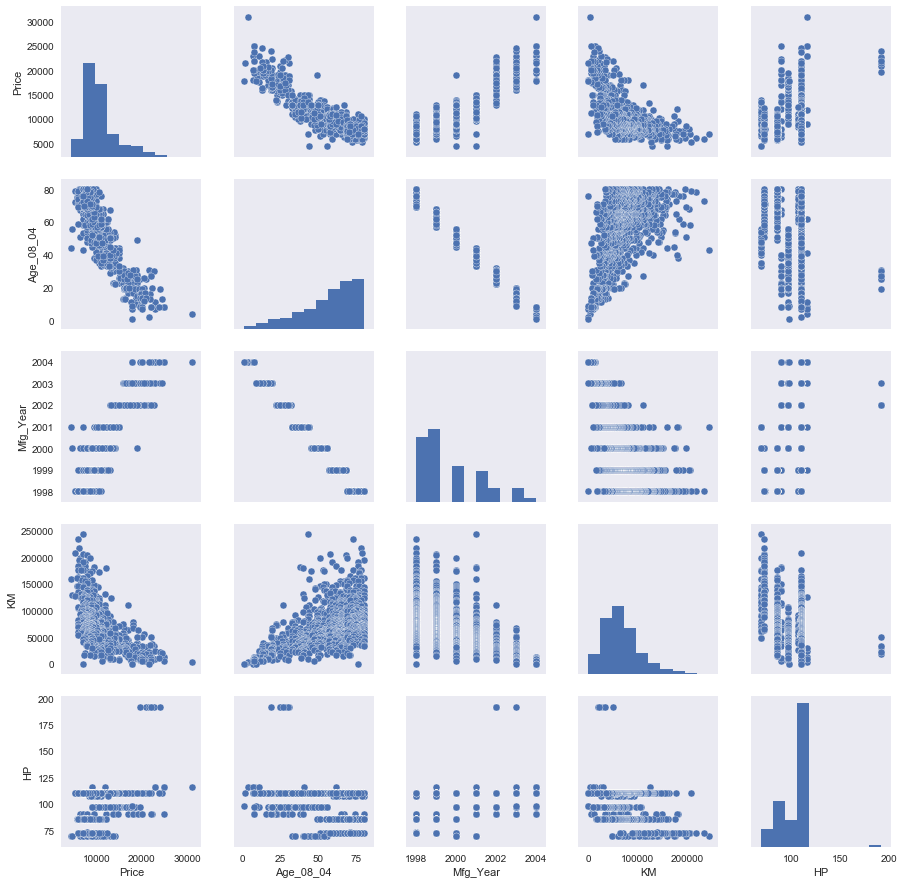

In [11]:
with plt.style.context(('seaborn-dark')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:4]]], axis=1))
plt.show()
# 'Age_08_04', 'Mfg_Year', 'KM', 'HP' : 연속성을 띄며 양적변수로 활용 가능할 것으로 판단됨

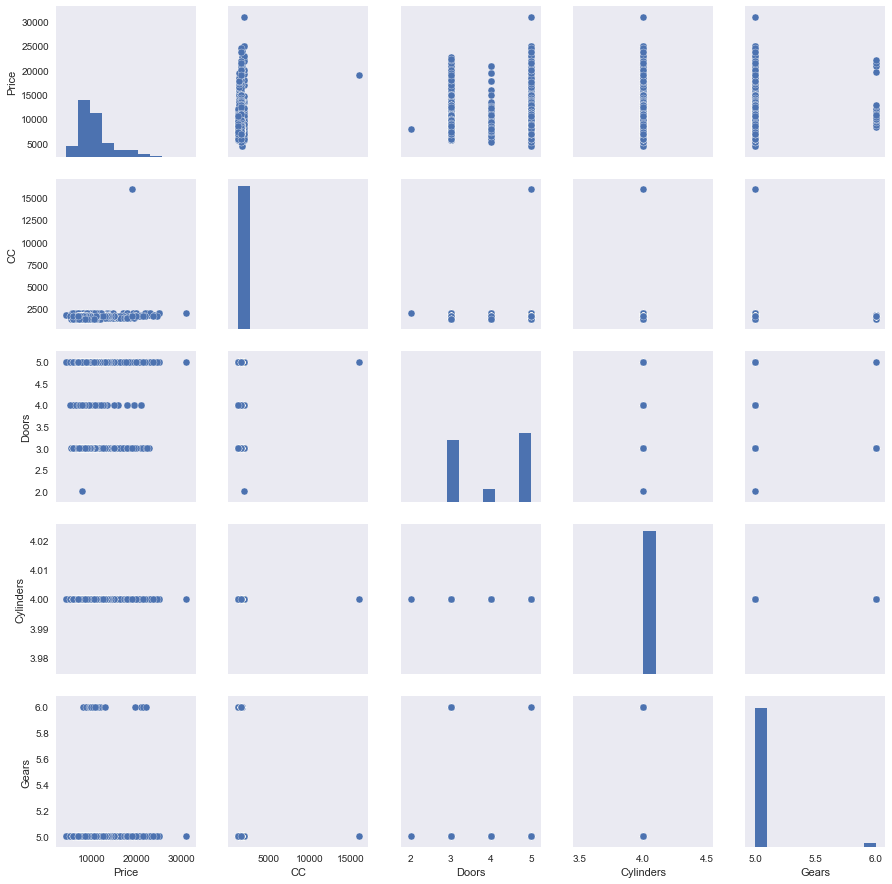

In [12]:
with plt.style.context(('seaborn-dark')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[4:8]]], axis=1))
plt.show()
# 'CC', 'Doors', 'Cylinders', 'Gears' :
## 'CC'의 경우는 이상치가 보이긴 하나, 이를 제외하고는 연속성을 보이며, 양적변수로 활용 가능 할 것으로 판단됨
### 단 이 경우 이상치에 대한 조치가 필요할 것으로 판단됨
## 'Doors', 'Cylinders', 'Gears' 의 경우 양적변수가 아닌 질적 변수로서 기능을 할 것으로 판단됨

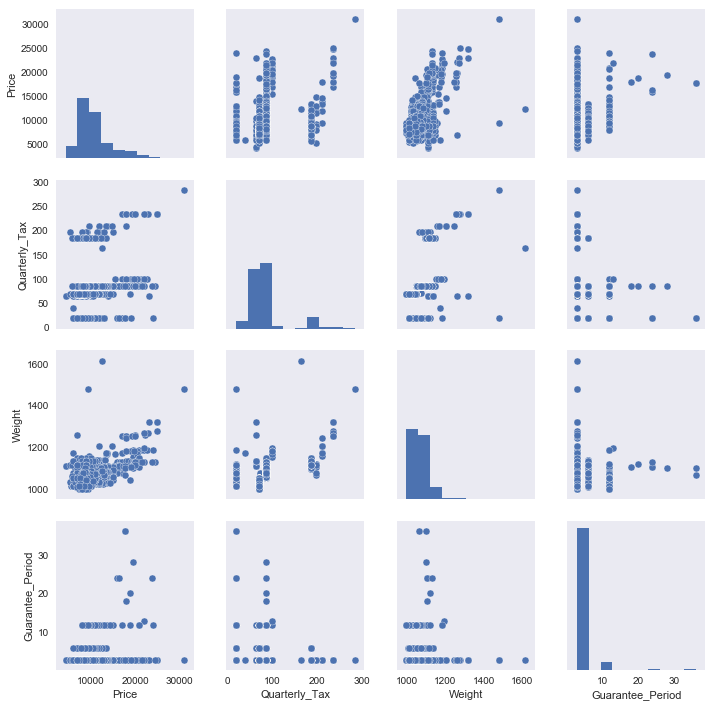

In [13]:
with plt.style.context(('seaborn-dark')):
    sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[8:]]], axis=1))
plt.show()
# 'Quarterly_Tax', 'Weight', 'Guarantee_Period':
## 3개 변수 모두 양적변수로서의 기능을 하는 것으로 판단 되며, 향후 분석 시 활용 가능할 것으로 보임

### 양적변수 분류
* 활용 가능 : 'Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Weight', 'Guarantee_Period', 'CC', 'Quarterly_Tax'
* 질적 변수로 이동 : 'Doors', 'Cylinders', 'Gears'

In [14]:
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Weight', 'Guarantee_Period', 'CC', 'Quarterly_Tax']
len(cols_real)

8

### 질적변수의 상자그림 확인
* x축 : 질적변수
* y축 : price

In [15]:
# 사전 분류한 25개에 양적변수 분류에서 넘어온 3개를 추가
cols_cat = ['Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
len(cols_cat)

28

In [16]:
## 여러개의 상자그림을 한번에 보게 해주는 함수(박재근 매니저 작)
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=dfX[cols_cat[start_idx + num]], y=dfy['Price'], palette="Set3", ax=ax)
            except:
                pass

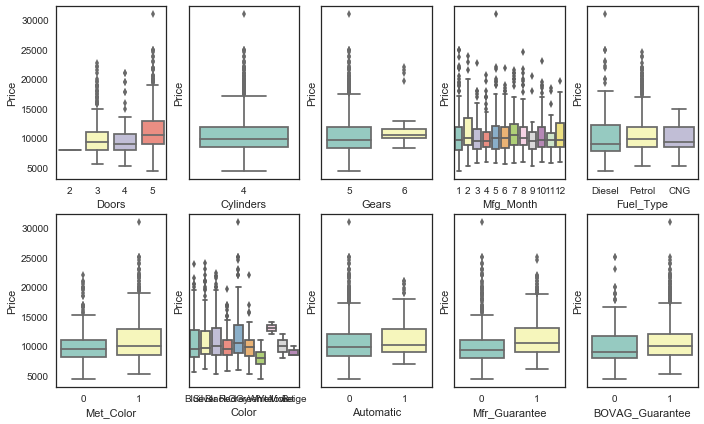

In [17]:
display_multi_boxplots('Doors', 2, 5)
plt.show()
# 'Cylinders' 의 경우 데이터가 4로 단일항목이므로, 향후 분석에서 제외하기로 함
## 이 외의 질적 변수들은 'Price'와 함께 T-test 혹은 ANOVA를 이용하여 해당 변수에 따른 'Price'의 차이 유무를 확인하고자 함


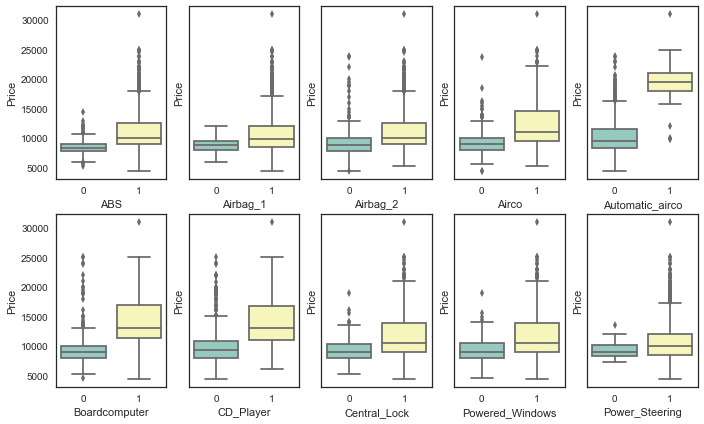

In [18]:
display_multi_boxplots('ABS', 2, 5)
plt.show()
## 위와 상동

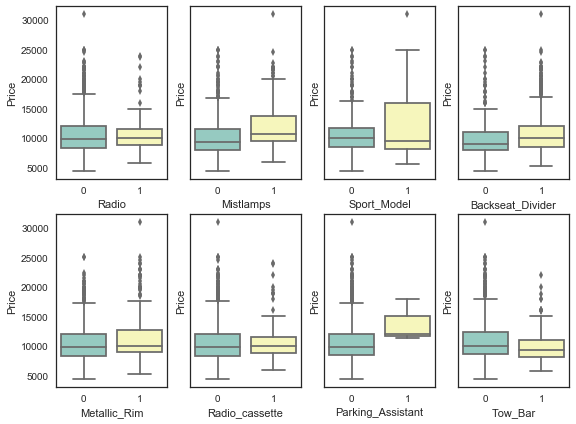

In [19]:
display_multi_boxplots('Radio', 2, 4)
plt.show()
## 위와 상동

### 질적변수 재분류
* 활용가능한 질적변수 : 'Doors', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
* 불가능한 변수 : 'Cylinders'
* 향후 분석방향 : T-test or ANOVA with 'Price'

In [20]:
# 'Cylinders'를 제외하고 질적변수 재 정리
cols_cat = ['Doors', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
len(cols_cat)

27

In [21]:
# DF 재 설정
dfX_real = dfX[cols_real]
dfX_cat = dfX[cols_cat]

print(len(dfX_real.columns), len(dfX_cat.columns))

(8, 27)


In [22]:
dfX_real.tail(2)

,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
1017,70,1998,16916,86,1015,3,1300,69
1018,76,1998,1,110,1114,3,1600,19


In [23]:
dfX_cat.head(2)

,Doors,Gears,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,5,10,Diesel,1,Blue,0,0,1,1,...,1,1,0,0,0,1,0,0,0,0
1,3,5,10,Diesel,1,Silver,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0


In [24]:
## 양적변수에서 이상치 확인
dfX_real.describe()

,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,56.041217,1999.623160,68177.927380,101.479882,1072.262022,3.810599,1579.582924,86.405299
std,18.615283,1.548589,37966.031948,14.811333,51.356826,2.925809,488.566949,39.276282
min,1.000000,1998.000000,1.000000,69.000000,1000.000000,3.000000,1300.000000,19.000000
25%,44.000000,1998.000000,41567.500000,86.000000,1040.000000,3.000000,1400.000000,69.000000
50%,61.000000,1999.000000,62280.000000,110.000000,1070.000000,3.000000,1600.000000,85.000000
75%,70.000000,2001.000000,86467.500000,110.000000,1085.000000,3.000000,1600.000000,85.000000
max,80.000000,2004.000000,243000.000000,192.000000,1615.000000,36.000000,16000.000000,283.000000


In [25]:
## 'KM'에서 1, 'CC'에서 16000에 대해서 확인 필요
dfX_real[dfX_real['KM']==1]
## ID 1018의 경우 76개월이 된 차량임에도 불구하고 주행거리(KM)가 1로 나타남
## 83, 125, 133의 경우 차량 구매 1년 이내에 운행을 거의 안했을 수 있다고 여길 수 있으므로 수정 불필요
## 1018에 대해서는 KM 값에 대한 조정 필요, 전체 평균을 넣어 이상치 조정


,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
83,7,2004,1,110,1105,3,1600,85
125,9,2003,1,98,1065,36,1400,19
133,1,2004,1,98,1100,36,1400,19
1018,76,1998,1,110,1114,3,1600,19


In [26]:
dfX_real['KM'][1018] = 68178
print dfX_real[1018:1019]

      Age_08_04  Mfg_Year     KM   HP  Weight  Guarantee_Period    CC  \
1018         76      1998  68178  110    1114                 3  1600   

      Quarterly_Tax  
1018             19  


c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
dfX_real[dfX_real['CC']==16000]
## 'CC'가 16000인 것은 1600을 잘못 입력한 것으로 판단, 1600으로 수정

,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
54,25,2002,20019,110,1180,3,16000,100


In [28]:
dfX_real['CC'][54] = 1600
print dfX_real[54:55]

    Age_08_04  Mfg_Year     KM   HP  Weight  Guarantee_Period    CC  \
54         25      2002  20019  110    1180                 3  1600   

    Quarterly_Tax  
54            100  


In [29]:
dfX_real.tail(2)

,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
1017,70,1998,16916,86,1015,3,1300,69
1018,76,1998,68178,110,1114,3,1600,19


In [30]:
over20000=df[df['Price'] >= 20000]
print(len(over20000))

27


### 상자그림에서의 이상치

* 상자그림에서 나온 Price의 이상치의 경우, 전체 데이터의 75%가 약 12000 이하에 분포하고 있어서 나타나는 현상으로 판단됨
* 평균 'Price'는 약 10700로, 히스토그램을 보더라도 전반적으로 데이터가 좌측으로 편향성을 보임
* 이러한 데이터의 분포 상, Price에 대한 이상치가 존재하는 것은 불가피하다고 여겨짐
* 따라서 향후 분석에 있어서 Price에 대한 이상치는 고려하지 않는 것으로 가정함

## 상관관계 분석
* 양적변수 간 상관관계를 알아보고, 'Price'와의 상관계수 도출

In [32]:
df = pd.concat([dfy.Price, dfX_real], axis=1)
df.tail(3)

,Price,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
1016,8500,71,1998,17016,86,1015,3,1300,69
1017,7250,70,1998,16916,86,1015,3,1300,69
1018,6950,76,1998,68178,110,1114,3,1600,19


In [33]:
# Correlation Matrix of dfX_real
corrmat = df.corr()
corrmat

,Price,Age_08_04,Mfg_Year,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
Price,1.000000,-0.883900,0.893302,-0.578729,0.314898,0.557015,0.166141,0.144315,0.178874
Age_08_04,-0.883900,1.000000,-0.984218,0.519201,-0.164049,-0.463990,-0.166382,-0.115616,-0.172089
Mfg_Year,0.893302,-0.984218,1.000000,-0.520656,0.170122,0.471215,0.160928,0.109086,0.173047
KM,-0.578729,0.519201,-0.520656,1.000000,-0.350157,-0.009735,-0.136980,0.319342,0.287228
HP,0.314898,-0.164049,0.170122,-0.350157,1.000000,0.078747,0.090731,0.040763,-0.324570
Weight,0.557015,-0.463990,0.471215,-0.009735,0.078747,1.000000,0.001592,0.619048,0.585494
Guarantee_Period,0.166141,-0.166382,0.160928,-0.136980,0.090731,0.001592,1.000000,-0.022610,-0.156661
CC,0.144315,-0.115616,0.109086,0.319342,0.040763,0.619048,-0.022610,1.000000,0.675267
Quarterly_Tax,0.178874,-0.172089,0.173047,0.287228,-0.324570,0.585494,-0.156661,0.675267,1.000000


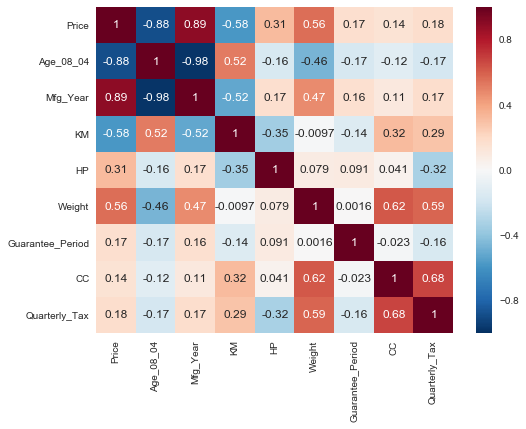

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)
plt.show()

### 상관관계 분석 결과(y = 'Price'):
* Age_08_04 : -0.88 / Mfg_Year : 0.89
* KM : -0.58 / HP : 0.31 / Weight : 0.56
* Guarantee_Period : 0.17 / CC : 0.14 / Quarterly_Tax : 0.18

* 양적 변수끼리 상관관계가 높을 경우 이에 대해 검토가 필요함
    * 상관관계 분석 결과, 'Age_08_04'와 'Mfg_Year' 사이에 '강한 -의 상관관계'가 나타났음
    * 이 외에는 'Age_08_04' & 'KM', 'Age_08_04' & 'Weight', 'Weight' & 'Mfg_Year', 'KM' & 'Mfg_Year', 'Weight' & 'Quarterly_Tax', 이상의 5개 관계에서 +- 0.5 전후의 상관관계가 나타남
    * 위의 두 경우에 대해서 상관계수를 추가적으로 파악할 필요가 있으며, 결과에 따라서 변수의 통합 또는 탈락을 결정해야 함

In [35]:
print sp.stats.pearsonr(df.Price, df.Age_08_04)
print sp.stats.pearsonr(df.Price, df.Mfg_Year)
print sp.stats.pearsonr(df.Price, df.KM)
print sp.stats.pearsonr(df.Price, df.HP)
print sp.stats.pearsonr(df.Price, df.Weight)
print sp.stats.pearsonr(df.Price, df.Guarantee_Period)
print sp.stats.pearsonr(df.Price, df.CC)
print sp.stats.pearsonr(df.Price, df.Quarterly_Tax)

(-0.88389997596143111, 0.0)
(0.8933019763297112, 0.0)
(-0.57872866766407949, 3.6639223282883597e-92)
(0.31489825814758804, 6.8285036237063916e-25)
(0.55701487105264824, 4.1793981498584848e-84)
(0.16614089142820712, 9.6010919331716667e-08)
(0.14431487918124911, 3.7393706686545642e-06)
(0.17887374583572183, 8.9566258633661032e-09)


### 상관계수 분석 결과(y = 'Price'):
* 'Price'와 양적 변수 간의 상관계수는 각각의 상관관계가 통계적으로 유의미한 것으로 나타남


### 양적변수 내 상관관계를 보이는 변수간의 관계 확인
* 양적 변수 내에서 일정 수준 이상의 상관관계를 보이는 변수들의 관계를 파악한 결과, 이들의 관계는 통계적으로 유의미하다고 나타남
* 따라서 해당 변수들을 사용할 경우, 서로의 영향관계를 고려하여 변수를 사용해야 함
    * 특히 'Age_08_04'와 'Mfg_Year'의 경우 매우 강한 상관관계를 보이므로, 반드시 변수를 재 조정해야 함
    * 자동차에 있어 제조연도와 사용개월수는 반비례의 관계를 보이므로, 좀더 자세한 수치를 나타내는 'Age_08_04'만 사용하기로 결정
    * 0.5를 전후한 상관관계가 나타난 변수에 대해서는 판단을 유보, 향후 회귀분석에서 사용하면서 판단하기로 함
    * 다중공선성을 파악하여 양적변수의 사용, 제외 여부를 판단할 예정

In [36]:
print sp.stats.pearsonr(df.Age_08_04, df.Mfg_Year)
print sp.stats.pearsonr(df.Age_08_04, df.KM)
print sp.stats.pearsonr(df.Age_08_04, df.Weight)
print sp.stats.pearsonr(df.Weight, df.Mfg_Year)
print sp.stats.pearsonr(df.KM, df.Mfg_Year)
print sp.stats.pearsonr(df.Weight, df.Quarterly_Tax)

(-0.98421817516171917, 0.0)
(0.51920144741741048, 2.0481681145661657e-71)
(-0.46398990488836933, 1.5512935048529205e-55)
(0.47121542657912485, 1.8798101441402733e-57)
(-0.5206556351983459, 7.120358678587799e-72)
(0.58549387257716101, 8.4724801432320449e-95)


### 질적변수에 따른 'Price'의 차이 분석
* 질적변수에 따라 'T-test' or 'ANOVA'를 사용

In [37]:
# 질적변수 확인
print cols_cat

['Doors', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']


In [38]:
df = pd.concat([dfy.Price, dfX_cat], axis=1)
df.head(3)

,Price,Doors,Gears,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,3,5,10,Diesel,1,Blue,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,13750,3,5,10,Diesel,1,Silver,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,13750,3,5,3,Diesel,0,Black,0,1,1,...,1,1,0,1,0,1,0,0,0,0


In [39]:
# 질적변수 별 구분값 확인

for col in dfX_cat.columns:
    print("%-17s : %s" % (col, df[col].unique()))

Doors             : [3 5 4 2]
Gears             : [5 6]
Mfg_Month         : [10  3  8  2  5  9  4  6  7  1 11 12]
Fuel_Type         : ['Diesel' 'Petrol' 'CNG']
Met_Color         : [1 0]
Color             : ['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet'
 'Beige']
Automatic         : [0 1]
Mfr_Guarantee     : [0 1]
BOVAG_Guarantee   : [1 0]
ABS               : [1 0]
Airbag_1          : [1 0]
Airbag_2          : [1 0]
Airco             : [0 1]
Automatic_airco   : [0 1]
Boardcomputer     : [1 0]
CD_Player         : [0 1]
Central_Lock      : [1 0]
Powered_Windows   : [1 0]
Power_Steering    : [1 0]
Radio             : [0 1]
Mistlamps         : [0 1]
Sport_Model       : [0 1]
Backseat_Divider  : [1 0]
Metallic_Rim      : [0 1]
Radio_cassette    : [0 1]
Parking_Assistant : [0 1]
Tow_Bar           : [0 1]


* 확인 결과, 'Doors', 'Mfg_Month', 'Fuel_Type', 'Color'는 ANOVA // 나머지는 T-test를 사용하여 분석

#### T-test 분석
* 상자그림과 T-test를 사용
* 사용 되는 모든 변수는 정규성가정, 등분산가정을 만족한다고 가정

In [40]:
def five_boxes_and_ttests(*args):
    
    with plt.style.context(('seaborn-white')):
        plt.subplots(1, 5, figsize=(12, 2.5), sharey=True)
        
        for i, arg in enumerate(args):
            tmp_list = df[arg].unique()
            result = sp.stats.ttest_ind(df['Price'][df[arg] == tmp_list[0]], 
                                        df['Price'][df[arg] == tmp_list[1]])
            statistics = result[0]
            pvalue = result[1]

            plt.subplot(1, 5, i+1)
            sns.boxplot(x=dfX[arg], y=dfy['Price'], palette="Set3")
            plt.title("t : %.4f, p-val : %.4f" % (statistics, pvalue))
            plt.yticks([])

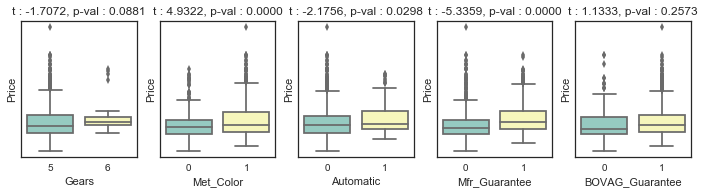

In [41]:
five_boxes_and_ttests("Gears", "Met_Color", "Automatic", "Mfr_Guarantee", "BOVAG_Guarantee")
plt.show()

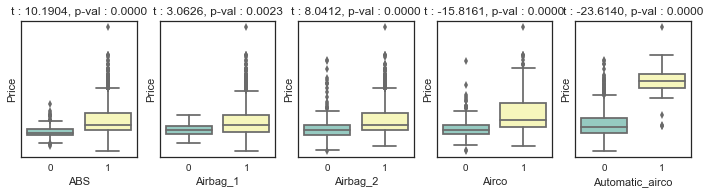

In [42]:
five_boxes_and_ttests("ABS", "Airbag_1", "Airbag_2", "Airco", "Automatic_airco")
plt.show()

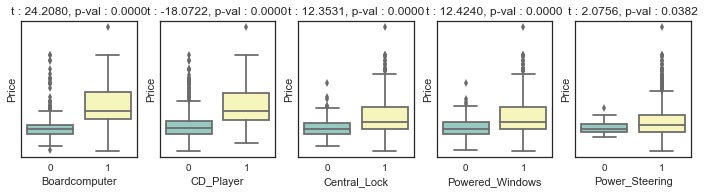

In [43]:
five_boxes_and_ttests("Boardcomputer", "CD_Player", "Central_Lock", "Powered_Windows", "Power_Steering")
plt.show()

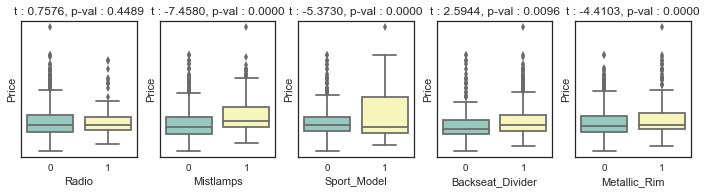

In [44]:
five_boxes_and_ttests("Radio", "Mistlamps", "Sport_Model", "Backseat_Divider", "Metallic_Rim")
plt.show()

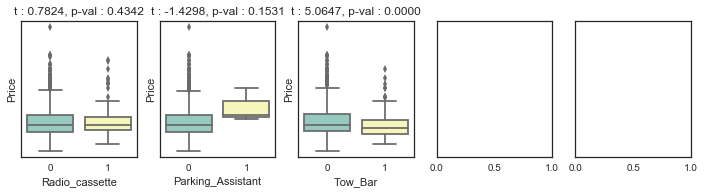

In [45]:
five_boxes_and_ttests("Radio_cassette", "Parking_Assistant", "Tow_Bar")
plt.show()

#### T-test 결과
* "Gears", "BOVAG_Guarantee", "Radio", "Radio_cassette", "Parking_Assistant" 의 구분에 따라 'Price'에 대해 통계적으로 유의미한 차이가 없는 것으로 나타남
* 그 외의 항목의 경우 'Price'에 대해 통계적으로 유의미한 차이가 나타남

#### ANOVA 분석
* 'Doors', 'Mfg_Month', 'Fuel_Type', 'Color' 변수에 대해 분석
* 사용 되는 모든 변수는 정규성가정, 등분산가정을 만족한다고 가정

In [46]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")

F_onewayResult(statistic=13.157426161496552, pvalue=1.9673598160673427e-08)


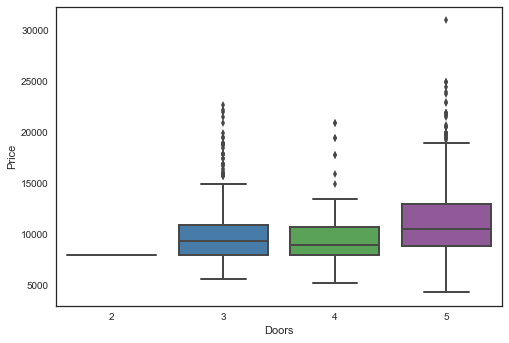

In [47]:
print sp.stats.f_oneway(df.loc[df["Doors"] == 2].Price, df.loc[df["Doors"] == 3].Price, df.loc[df["Doors"] == 4].Price, df.loc[df["Doors"] == 5].Price)

display_boxplot('Doors')
plt.show()

F_onewayResult(statistic=1.5786619529849342, pvalue=0.099474951295356162)


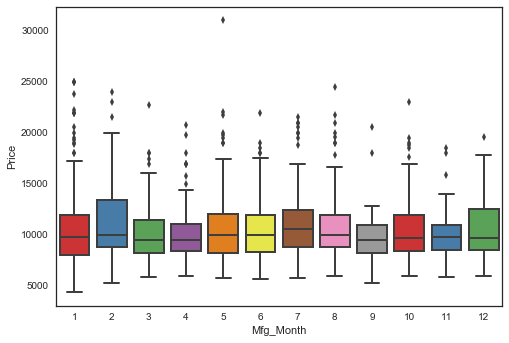

In [48]:
print sp.stats.f_oneway(df.loc[df["Mfg_Month"] == 1].Price,
                      df.loc[df["Mfg_Month"] == 2].Price,
                      df.loc[df["Mfg_Month"] == 3].Price,
                      df.loc[df["Mfg_Month"] == 4].Price,
                      df.loc[df["Mfg_Month"] == 5].Price,
                      df.loc[df["Mfg_Month"] == 6].Price,
                      df.loc[df["Mfg_Month"] == 7].Price,
                      df.loc[df["Mfg_Month"] == 8].Price,
                      df.loc[df["Mfg_Month"] == 9].Price,
                      df.loc[df["Mfg_Month"] == 10].Price,
                      df.loc[df["Mfg_Month"] == 11].Price,
                      df.loc[df["Mfg_Month"] == 12].Price)
display_boxplot('Mfg_Month')
plt.show()

F_onewayResult(statistic=0.25809499656682311, pvalue=0.77257247583330801)


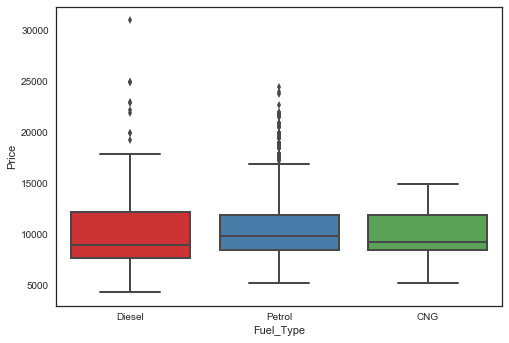

In [49]:
print sp.stats.f_oneway(df.loc[df["Fuel_Type"] == 'Petrol'].Price, 
                        df.loc[df["Fuel_Type"] == 'Diesel'].Price, 
                        df.loc[df["Fuel_Type"] == 'CNG'].Price)

display_boxplot('Fuel_Type')
plt.show()

F_onewayResult(statistic=6.4992939839071502, pvalue=4.9278984813672524e-09)


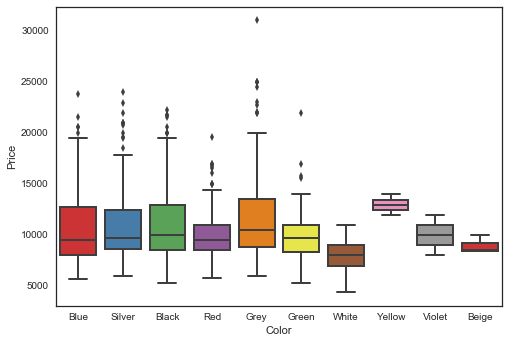

In [50]:
print sp.stats.f_oneway(df.loc[df["Color"] == 'Beige'].Price, 
                      df.loc[df["Color"] == 'Black'].Price, 
                      df.loc[df["Color"] == 'Blue'].Price, 
                      df.loc[df["Color"] == 'Green'].Price, 
                      df.loc[df["Color"] == 'Grey'].Price, 
                      df.loc[df["Color"] == 'Red'].Price, 
                      df.loc[df["Color"] == 'Silver'].Price, 
                      df.loc[df["Color"] == 'Violet'].Price, 
                      df.loc[df["Color"] == 'White'].Price, 
                      df.loc[df["Color"] == 'Yellow'].Price)

display_boxplot('Color')
plt.show()

#### Anova 결과
* "Mfg_Month", "Fuel_Type" 의 구분에 따라 'Price'에 대해 통계적으로 유의미한 차이가 없는 것으로 나타남
* "Doors", "Color" 항목의 경우 'Price'에 대해 통계적으로 유의미한 차이가 나타남

### 질적변수의 구분에 따른 'Price'의 차이 분석 결과 종합

* "Gears", "BOVAG_Guarantee", "Radio", "Radio_cassette", "Parking_Assistant", "Mfg_Month", "Fuel_Type" 변수는 'Price'에 대해 통계적으로 유의미한 차이가 나지 않는 것으로 나타남
* 그 외의 항목의 경우 'Price'에 대해 통계적으로 유의미한 차이가 나타남
* 즉 상기 7개의 질적변수는 향후 분석 시 분석 대상에서 가급적 제외하는 것이 바람직하다고 판단됨

### 회귀분석

In [51]:
# 회귀분석 용 데이터 프레임 생성
regDf = pd.read_csv("train.csv")
regDf.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0


In [52]:
## 이상치 조정
regDf['KM'][1018] = 68178
regDf['CC'][54] = 1600

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 회귀분석 1차

In [53]:
cols_reg_1st = ['Price', 'Age_08_04', 'KM', 'HP', 'Weight', 'Guarantee_Period', 'CC', 'Quarterly_Tax']
regDf_1st = regDf[cols_reg_1st]
regDf_1st.head(2)

,Price,Age_08_04,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
0,13500,23,46986,90,1165,3,2000,210
1,13750,23,72937,90,1165,3,2000,210


In [54]:
# 종속변수 : 'Price'
# 독립변수 : 'Age_08_04', 'KM', 'HP', 'Weight', 'Guarantee_Period', 'CC', 'Quarterly_Tax'

regModel1 = smf.ols('Price ~ Age_08_04+KM+HP+Weight+Guarantee_Period+CC+Quarterly_Tax', regDf_1st).fit()
regModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     936.7
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:47:34   Log-Likelihood:                -8768.3
No. Observations:                1019   AIC:                         1.755e+04
Df Residuals:                    1011   BIC:                         1.759e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2006.4810   1227.368     -1.635      0.102   -4414.962     402.000
Age_08_04         -123.2996      3.154    -39.098      0.000    -129.488    -117.111
KM                  -0.0174      0.002    -11.319      0.000      -0.020      -0.014
HP                  39.0630      3.500     11.160      0.000      32.194      45.932
Weight              17.6793      1.248     14.163      0.000      15.230      20.129
Guarantee_Period    41.7829     14.798      2.824      0.005      12.744      70.822
CC                  -1.9313      0.372     -5.188      0.000      -2.662      -1.201
Quarterly_Tax        9.1173      1.798      5.072      0.000       5.590      12.645
==============================================================================
Omnibus:                      133.975   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1199.706
Skew:                          -0.233   Prob(JB):                    3.07e-261
Kurtosis:                       8.295   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1차 회귀분석 결과
* 회귀모델 p = 0.000, F = 936.700 로 회귀모델은 통계적으로 유의미함
* 독립변수와 종속변수의 영향관계 : 모든 독립변수는 종속변수 'Price'에 통계적으로 유의미한 영향관계를 보임
* 회귀모델의 Adj R^2 = 0.865 로 나타남

In [55]:
# 1차 다중공선성 진단
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)
        
#Calculating VIF values using that function
vif_cal(input_data=regDf_1st, dependent_col="Price")

('Age_08_04', ' VIF = ', 2.0)
('KM', ' VIF = ', 1.97)
('HP', ' VIF = ', 1.56)
('Weight', ' VIF = ', 2.38)
('Guarantee_Period', ' VIF = ', 1.09)
('CC', ' VIF = ', 2.75)
('Quarterly_Tax', ' VIF = ', 2.89)


* 1차 회귀분석에 따른 다중공선성 확인 결과, 독립변수들의 VIF 값이 모두 10 이하로 나타남
* 상관분석 시 나타난 독립변수 간 상관관계는 회귀분석에서 문제가 없다고 판단할 수 있음
* 그러나 'Guarantee_Period', 'CC', 'Quarterly_Tax' 의 경우 'Price'와 상관분석 시 상관계수가 0.2 이하로 나타났으므로
* 이들 변수를 제외하고 다시 회귀분석을 실시하고자 함

### 회귀분석 2차

In [56]:
cols_reg_2nd = ['Price', 'Age_08_04', 'KM', 'HP', 'Weight']
regDf_2nd = regDf[cols_reg_2nd]
regDf_2nd.head(1)

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165


In [57]:
# 종속변수 : 'Price'
# 독립변수 : 'Age_08_04', 'KM', 'HP', 'Weight'

regModel2 = smf.ols('Price ~ Age_08_04+KM+HP+Weight', regDf_2nd).fit()
regModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1576.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:47:34   Log-Likelihood:                -8787.0
No. Observations:                1019   AIC:                         1.758e+04
Df Residuals:                    1014   BIC:                         1.761e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2398.8979   1140.820     -2.103      0.036   -4637.535    -160.260
Age_08_04   -125.7663      3.159    -39.817      0.000    -131.964    -119.568
KM            -0.0189      0.001    -13.011      0.000      -0.022      -0.016
HP            29.2868      3.065      9.554      0.000      23.271      35.302
Weight        17.2556      0.981     17.581      0.000      15.330      19.181
==============================================================================
Omnibus:                      108.245   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.718
Skew:                          -0.223   Prob(JB):                    1.70e-150
Kurtosis:                       7.006   Cond. No.                     2.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2차 회귀분석 결과
* 회귀모델 p = 0.000, F = 1576.000 로 회귀모델은 통계적으로 유의미함, 1차때 보다 F 값이 오름
* 독립변수와 종속변수의 영향관계 : 모든 독립변수는 종속변수 'Price'에 통계적으로 유의미한 영향관계를 보임
* 회귀모델의 Adj R^2 = 0.861 로 나타남

In [58]:
# 2차 다중공선성 진단

vif_cal(input_data=regDf_2nd, dependent_col="Price")

('Age_08_04', ' VIF = ', 1.94)
('KM', ' VIF = ', 1.7)
('HP', ' VIF = ', 1.15)
('Weight', ' VIF = ', 1.42)


* 2차 회귀분석에 따른 다중공선성 확인 결과, 독립변수들의 VIF 값이 모두 10 이하로 나타남
* 1차 때와 비교해서 미세한 차이는 있으나 결과 해석이 바뀔 정도의 차이는 아님
* 향후 독립변수를 추가할 경우 다시 진단해보기로 함

### 1차 - 2차 회귀분석 결과 비교
* 1차, 2차 회귀분석 결과 'Guarantee_Period', 'CC', 'Quarterly_Tax' 의 제외 이후, 'HP'의 경우 회귀계수가 10정도 감소, 그 외에는 큰 차이 없음
* Adj R^2 값도 미세하게 줄어들었으며, F값은 600이상 상승
* 두 모델 모두 통계적으로는 문제가 없으나, 어떠한 모델이 적합한 지에 대해서는 추가적인 검토가 필요함

#### 질적변수의 사용 가능성 검토
* 현재 질적변수의 경우 회귀분석에 사용할 수 없음, 양적 자료로 변환이 어렵기 때문
* 그러나 T-test를 실시한 질적변수의 경우, 그 값을 0과 1로 나타내고 있으며 이를 Id 별로 합하여 계산한 새로운 변수를 생성할 경우, 양적 변수로서 활용이 가능할 것으로 보임
* 이렇게 활용이 가능한 질적변수는, 자동차의 Option으로서 중고차 판매-구매 고려 시 또 다른 판단 기준이 된다고 할 수 있음
* 통상적으로 볼 때, 자동차의 Option이 많을 수록, 자동차의 가격이 변화함
* 따라서, 0과 1로 값이 나타난 질적변수를 Id 별로 합하여, 'Option' 이라는 새로운 양적 변수를 생성하여 회귀분석해 사용해 보려 함
* 'Doors' 'Mfg_Month' 'Fuel_Type' 'Color' 의 경우, 3개 이상의 응답이 있으므로 우선적으로 제외
* T-test에서 'Price'에 대해 통계적으로 유의한 차이가 나타나지 않은 "Gears", "BOVAG_Guarantee", "Radio", "Radio_cassette", "Parking_Assistant" 항목도 제외
* 최종적으로 'Met_Color', 'Automatic', 'Mfr_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Tow_Bar' 사용

#### Option변수를 추가한 회귀분석
* 1차모델과 2차모델에 각각 Option변수를 넣고 추가적으로 분석 실시

### 회귀분석 3차 (1차 + options)

In [59]:
regDf_3rd = regDf_1st
regDf_3rd.head(1)

,Price,Age_08_04,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax
0,13500,23,46986,90,1165,3,2000,210


In [60]:
# 'Options' 변수 생성
regDf_3rd['Options'] = regDf['Met_Color'] + regDf['Automatic'] + regDf['Mfr_Guarantee'] + regDf['ABS'] + regDf['Airbag_1'] + regDf['Airbag_2'] + regDf['Airco'] + regDf['Automatic_airco'] + regDf['Boardcomputer'] + regDf['CD_Player'] + regDf['Central_Lock'] + regDf['Powered_Windows'] + regDf['Power_Steering'] + regDf['Mistlamps'] + regDf['Sport_Model'] + regDf['Backseat_Divider'] + regDf['Metallic_Rim'] + regDf['Tow_Bar']

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
regDf_3rd.head(1)

,Price,Age_08_04,KM,HP,Weight,Guarantee_Period,CC,Quarterly_Tax,Options
0,13500,23,46986,90,1165,3,2000,210,9


In [62]:
# 3차 회귀분석 with 'Options'
# 종속변수 : 'Price'
# 독립변수 : 'Age_08_04', 'KM', 'HP', 'Weight', 'Guarantee_Period', 'CC', 'Quarterly_Tax', 'Options'

regModel3 = smf.ols('Price ~ Age_08_04+KM+HP+Weight+Guarantee_Period+CC+Quarterly_Tax+Options', regDf_3rd).fit()
regModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     861.9
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:47:34   Log-Likelihood:                -8745.6
No. Observations:                1019   AIC:                         1.751e+04
Df Residuals:                    1010   BIC:                         1.755e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3142.2873   1212.472     -2.592      0.010   -5521.541    -763.034
Age_08_04         -112.5941      3.465    -32.494      0.000    -119.394    -105.795
KM                  -0.0180      0.002    -11.940      0.000      -0.021      -0.015
HP                  31.6960      3.593      8.823      0.000      24.646      38.746
Weight              17.7372      1.221     14.523      0.000      15.341      20.134
Guarantee_Period    76.1051     15.336      4.963      0.000      46.011     106.199
CC                  -1.7603      0.365     -4.822      0.000      -2.477      -1.044
Quarterly_Tax        7.8463      1.769      4.436      0.000       4.375      11.317
Options            112.4749     16.566      6.790      0.000      79.967     144.982
==============================================================================
Omnibus:                      125.309   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1171.627
Skew:                          -0.085   Prob(JB):                    3.84e-255
Kurtosis:                       8.250   Cond. No.                     2.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3차 회귀분석 결과
* 회귀모델 p = 0.000, F = 861.900 로 회귀모델은 통계적으로 유의미함, 1차때 보다 F 값이 내려갔음
* 독립변수와 종속변수의 영향관계 : 모든 독립변수는 종속변수 'Price'에 통계적으로 유의미한 영향관계를 보임
* 회귀모델의 Adj R^2 = 0.871 로, 1차에 비해 미세하게 높은 것으로 나타남
* 특이점 : Options의 회귀계수가 112.475로, Option의 개수에 따라 'Price'가 탄력적으로 변화하는 것을 알 수 있음

In [63]:
# 3차 다중공선성 진단

vif_cal(input_data=regDf_3rd, dependent_col="Price")

('Age_08_04', ' VIF = ', 2.52)
('KM', ' VIF = ', 1.98)
('HP', ' VIF = ', 1.71)
('Weight', ' VIF = ', 2.38)
('Guarantee_Period', ' VIF = ', 1.22)
('CC', ' VIF = ', 2.76)
('Quarterly_Tax', ' VIF = ', 2.92)
('Options', ' VIF = ', 1.73)


* 3차 회귀분석에 따른 다중공선성 확인 결과, 독립변수들의 VIF 값이 모두 10 이하로 나타남
* 독립변수 간 영향관계는 없다고 판단할 수 있음

### 회귀분석 4차 (2차 + options)

In [64]:
regDf_4th = regDf_2nd
regDf_4th.head(1)

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165


In [65]:
# 'Options' 변수 생성
regDf_4th['Options'] = regDf['Met_Color'] + regDf['Automatic'] + regDf['Mfr_Guarantee'] + regDf['ABS'] + regDf['Airbag_1'] + regDf['Airbag_2'] + regDf['Airco'] + regDf['Automatic_airco'] + regDf['Boardcomputer'] + regDf['CD_Player'] + regDf['Central_Lock'] + regDf['Powered_Windows'] + regDf['Power_Steering'] + regDf['Mistlamps'] + regDf['Sport_Model'] + regDf['Backseat_Divider'] + regDf['Metallic_Rim'] + regDf['Tow_Bar']

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
regDf_4th.head(1)

,Price,Age_08_04,KM,HP,Weight,Options
0,13500,23,46986,90,1165,9


In [67]:
# 4차 회귀분석 with 'Options'
# 종속변수 : 'Price'
# 독립변수 : 'Age_08_04', 'KM', 'HP', 'Weight', 'Options'

regModel4 = smf.ols('Price ~ Age_08_04+KM+HP+Weight+Options', regDf_4th).fit()
regModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        15:47:34   Log-Likelihood:                -8768.6
No. Observations:                1019   AIC:                         1.755e+04
Df Residuals:                    1013   BIC:                         1.758e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2892.4806   1123.837     -2.574      0.010   -5097.795    -687.166
Age_08_04   -117.3368      3.397    -34.546      0.000    -124.002    -110.672
KM            -0.0194      0.001    -13.589      0.000      -0.022      -0.017
HP            24.4357      3.115      7.845      0.000      18.323      30.548
Weight        16.9924      0.965     17.603      0.000      15.098      18.887
Options       96.1557     15.743      6.108      0.000      65.264     127.047
==============================================================================
Omnibus:                       95.731   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.031
Skew:                          -0.031   Prob(JB):                    2.80e-134
Kurtosis:                       6.805   Cond. No.                     2.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4차 회귀분석 결과
* 회귀모델 p = 0.000, F = 1313.000 로 회귀모델은 통계적으로 유의미함, 2차때 보다 F 값이 내려갔음
* 독립변수와 종속변수의 영향관계 : 모든 독립변수는 종속변수 'Price'에 통계적으로 유의미한 영향관계를 보임
* 회귀모델의 Adj R^2 = 0.866 로, 2차에 비해 미세하게 높은 것으로 나타남

In [68]:
# 4차 다중공선성 진단

vif_cal(input_data=regDf_4th, dependent_col="Price")

('Age_08_04', ' VIF = ', 2.32)
('KM', ' VIF = ', 1.7)
('HP', ' VIF = ', 1.23)
('Weight', ' VIF = ', 1.43)
('Options', ' VIF = ', 1.5)


* 4차 회귀분석에 따른 다중공선성 확인 결과, 독립변수들의 VIF 값이 모두 10 이하로 나타남
* 독립변수 간 영향관계는 없다고 판단할 수 있음

### 4차에 걸친 회귀분석 결과 종합
* 4가지 모델 모두 통계적으로 유의미한 모델임
* Adj R^2의 경우 0.861~0.871의 범위 안에 있으며, 실질적으로 큰 차이가 나지 않음
* 4가지 모델의 모든 독립변수는 종속변수 'Price'에 통계적으로 유의미한 영향관계에 있음

## 최종 회귀 모델 도출

* 앞서 분석 결과에서 4번째 모델을 최종 모델로 결정 (p = 0.000, F = 1313.000)
    - 상관분석, Anova, T-test, 그리고 질적변수 통합을 통해서 가장 명료하고 다양한 요인으로 설명이 가능한 모델을 도출
* 최종 모델의 종속변수 : 'Price'
* 최종 모델의 독립변수 : 'Age_08_04'(-117.337, 0.000), 'KM'(-0.019, 0.000), 'HP'(24.436, 0.000), 'Weight'(16.992, 0.000), 'Options'(96.156, 0.000)
* Adj R^2 : 0.866 로, 최종 회귀모델은 중고차 가격을 예측하는데 약 86.6%의 설명력을 갖추었다고 볼 수 있음
* Train set에 적용한 예측값의 평균은 약 10,739.81, 종속변수 'Price'의 평균은 약 10,738.36로 평균 잔차는 약 -1.45로 나타남
* Test set에 적용한 결과, 최종 예측값의 평균은 약 10,769.83으로 나타남

In [69]:
regDf_4th['Predict_Price'] = -2892.4806 + (-117.3368*regDf_4th['Age_08_04']) + (-0.0194*regDf_4th['KM']) + (24.4357*regDf_4th['HP']) + (16.9924*regDf_4th['Weight']) + (96.1557*regDf_4th['Options'])
regDf_4th['P-Pred'] = regDf_4th['Price'] - regDf_4th['Predict_Price']
regDf_4th.describe()

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Price,Age_08_04,KM,HP,Weight,Options,Predict_Price,P-Pred
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,10738.358194,56.041217,68244.833170,101.479882,1072.262022,8.651619,10739.812217,-1.454023
std,3614.987568,18.615283,37905.793673,14.811333,51.356826,3.226140,3364.226505,1321.675575
min,4350.000000,1.000000,1.000000,69.000000,1000.000000,0.000000,4542.265800,-9051.817700
25%,8400.000000,44.000000,41668.000000,86.000000,1040.000000,6.000000,8289.690900,-785.007650
50%,9850.000000,61.000000,62377.000000,110.000000,1070.000000,8.000000,9915.042900,-26.609200
75%,11950.000000,70.000000,86467.500000,110.000000,1085.000000,11.000000,12470.887700,780.605100
max,31000.000000,80.000000,243000.000000,192.000000,1615.000000,17.000000,25986.200900,6415.984100


### 한계점
* T-test, Anova, Correlation 분석 시, 사용한 변수에 대한 정규성, 등분산 검정 등에 대해서 모두 만족한다고 가정함
    - 통계학적인 접근을 정밀히 하기 위해서는, 이러한 사전 검정들의 선행이 이루어 졌어야 함
* 회귀분석 시 'Options' 변수를 추가적으로 생성해서 사용하였는데, 이 변수의 사용의 타당성과, 변수 생성 기준에 대한 추가적인 논의가 필요
* 본 분석은 통계학적 관점에서 이루어졌으므로, 머신러닝 관점에서의 분석과 시행 역시 시도해 볼 필요가 있음